Name- Kartik Nandu Gore



**Task-2**
# MOVIE RATING PREDICTION WITH PYTHON

In [2]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [16]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')

In [17]:
print(df.columns.tolist())


['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


Using target column: Rating
RMSE: 1.21
R² Score: 0.21


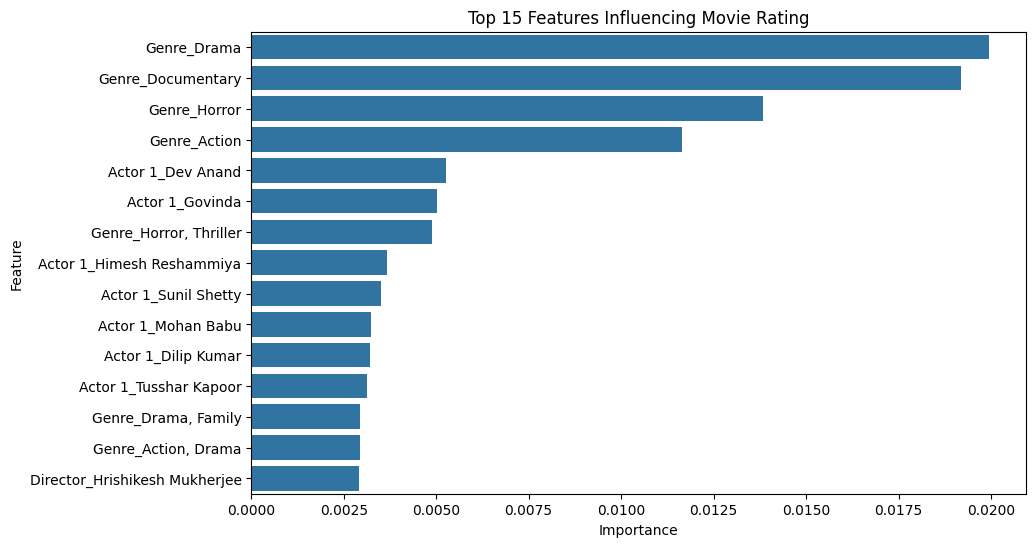

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1 — Identify target column (rating)
possible_targets = ['IMDB Rating', 'IMDb Rating', 'Rating']
target_col = None
for col in df.columns:
    if col.strip() in possible_targets:
        target_col = col
        break

if target_col is None:
    raise ValueError("Couldn't find a rating column in the dataset.")

print(f"Using target column: {target_col}")

# STEP 2 — Handle missing values
df = df.dropna(subset=[target_col])
df.fillna('Unknown', inplace=True)

# STEP 3 — Select features (based on common columns in IMDb datasets)
feature_cols = [c for c in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'] if c in df.columns]
X = df[feature_cols]
y = df[target_col]

# STEP 4 — One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), feature_cols)
    ]
)

# STEP 5 — Build model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# STEP 6 — Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7 — Train model
model.fit(X_train, y_train)

# STEP 8 — Predictions
y_pred = model.predict(X_test)

# STEP 9 — Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# STEP 10 — Feature importance plot
rf_model = model.named_steps['regressor']
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(feature_cols)
importances = rf_model.feature_importances_

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Top 15 Features Influencing Movie Rating")
plt.show()


**Top 10 Genres by Average Rating**

/tmp/ipython-input-2868503729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values, y=genre_avg.index, palette="viridis")


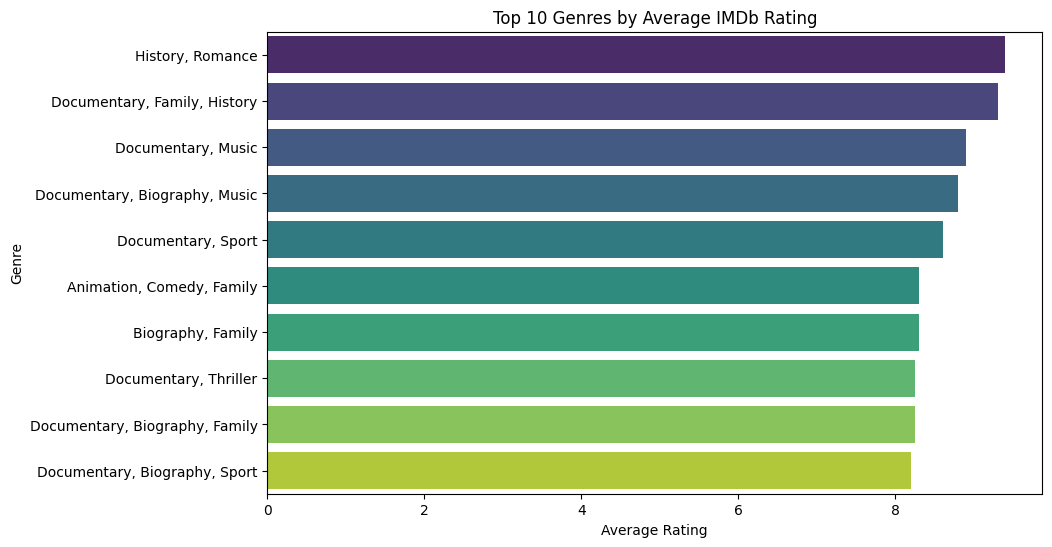

In [21]:
if 'Genre' in df.columns:
    plt.figure(figsize=(10,6))
    genre_avg = df.groupby('Genre')[target_col].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=genre_avg.values, y=genre_avg.index, palette="viridis")
    plt.title("Top 10 Genres by Average IMDb Rating")
    plt.xlabel("Average Rating")
    plt.ylabel("Genre")
    plt.show()

**Top 10 Directors by Average Rating**

/tmp/ipython-input-3471849278.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_avg['mean'], y=director_avg.index, palette="coolwarm")


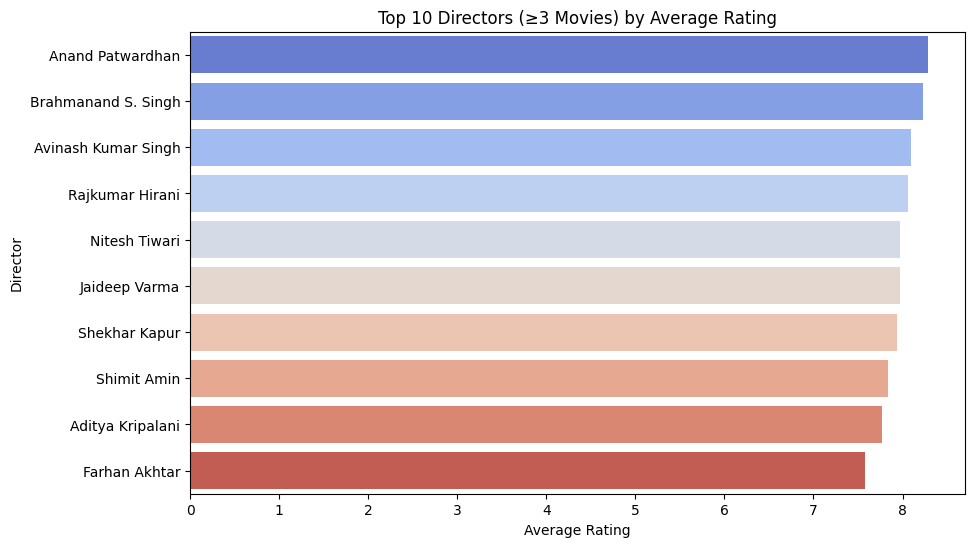

In [22]:
if 'Director' in df.columns:
    plt.figure(figsize=(10,6))
    director_avg = df.groupby('Director')[target_col].agg(['mean','count'])
    director_avg = director_avg[director_avg['count'] >= 3]  # only directors with >=3 movies
    director_avg = director_avg.sort_values('mean', ascending=False).head(10)
    sns.barplot(x=director_avg['mean'], y=director_avg.index, palette="coolwarm")
    plt.title("Top 10 Directors (≥3 Movies) by Average Rating")
    plt.xlabel("Average Rating")
    plt.ylabel("Director")
    plt.show()

**Genre vs Rating Boxplot**

/tmp/ipython-input-300510931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=target_col, data=df[df['Genre'].isin(top_genres)], palette="Set2")


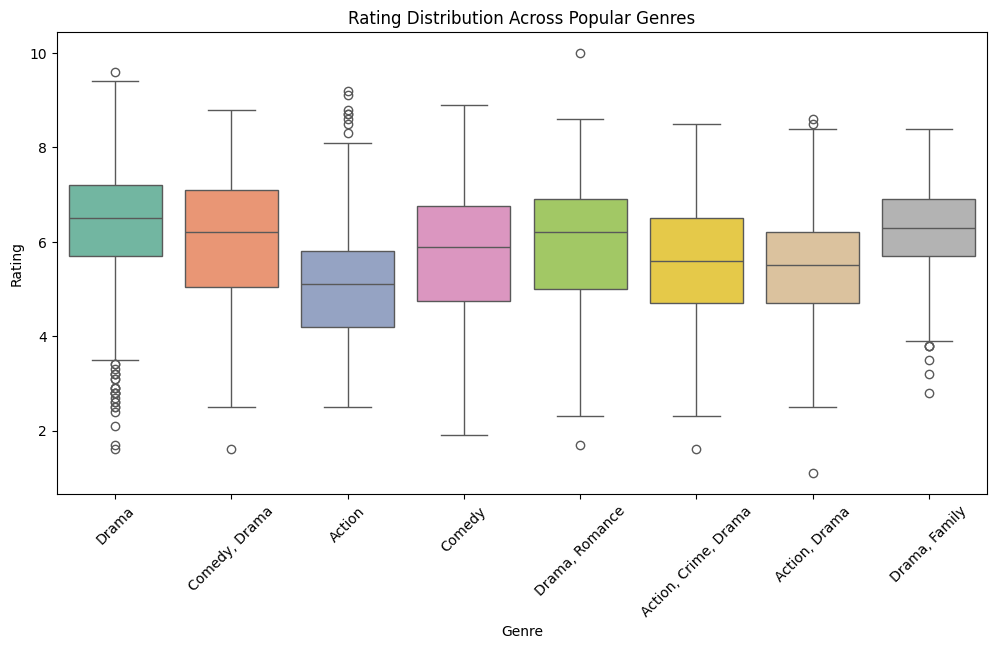

In [23]:
if 'Genre' in df.columns:
    plt.figure(figsize=(12,6))
    top_genres = df['Genre'].value_counts().head(8).index
    sns.boxplot(x='Genre', y=target_col, data=df[df['Genre'].isin(top_genres)], palette="Set2")
    plt.title("Rating Distribution Across Popular Genres")
    plt.xticks(rotation=45)
    plt.show()